In [1]:
import numpy as np
from matplotlib import pyplot as plt


I am implementing value iteration and policy iteration algorithms as given in Chapter 4 of **'Reinforcement Learning: An Introduction' by Sutton and Barto.**
(Figure 4.3:Policy Iteration and Figure 4.5:Value Iteration)

In [2]:
##Initializing the states

grid_type = ['Normal', 'GreyIn', 'BrownIn', 'Goal']
##              0         1         2          3

Grid = np.zeros([10,10], dtype='uint8')
Grid[0][0] = 1
Grid[7][9] = 2
Grid[3][0] = 3 #Goal 1


print(np.flip(Grid.T, axis=0))
print(Grid[9, 9])

[[0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 3 0 0 0 0 0 0]]
0


In [3]:
## Implementing probablity function
## a is a string in 'up', 'down', 'left', 'right'

actions = ['up', 'down', 'left', 'right']

def p (s, a, sf):
  if grid_type[Grid[s[0]][s[1]]] == 'GreyIn':
    if sf[0] == 2 and sf[1] >= 3 and sf[1] <=7:
      return 1/4
    else:
      return 0
  elif grid_type[Grid[s[0]][s[1]]] == 'BrownIn':
    if sf == [7, 1]:
      return 1
    else:
      return 0
  elif grid_type[Grid[s[0]][s[1]]] == 'Goal':
    if sf == s:
      return 1
    else:
      return 0
  c = {}
  if (s[1] < 9):
    c['up'] = [s[0], s[1] + 1]
  else:
    c['up'] = [s[0], s[1]]
  if (s[1] > 0):
    c['down'] = [s[0], s[1]-1]
  else:
    c['down'] = [s[0], s[1]]
  if (s[0] < 9):
    c['right'] = [s[0]+1, s[1]]
  else:
    c['right'] = [s[0], s[1]]
  if (s[0] > 0):
    c['left'] = [s[0]-1, s[1]]
  else:
    c['left'] = [s[0], s[1]]

  p = 0
  for key, value in c.items():
    if sf == value and key == a:
      p += 0.8
    elif sf == value:
      p += 0.2/3
  
  return p  




In [4]:
## Sanity check for probability function

print (p ([0, 9], 'down', [0, 9]))


0.13333333333333333


I am modelling the problem as an infinite horizon problem such that the Goal state only has a transition to itself with probability 1.

Reaching the Goal state from any other state entails an Reward of +10 but reaching Goal from itself (after termination) would not not entail any rewards. (Although it wouldn't affect the policies since it would just mean scaling reward by 1/(1-alpha).

In [5]:


## Reward Function
def r (s, sf):
  if s != sf and grid_type[Grid[sf[0]][sf[1]]] == 'Goal':
    return 10
  else:
    return 0

## Sanity check for reward function
print(r([9,9],[9,9]))
print (r([3,4], [9,9]))

0
0


In [6]:
## Choose 3 random states for question 2b. 
random_states = {}
random_states[(5, 5)] = []
random_states[(7, 2)] = []
random_states[(2, 8)] = []
random_states[(9, 9)] = []
random_states[(1, 8)] = []
# random_states[(1, 4)] = []
# random_states[(3, 6)] = []
# random_states[(3, 0)] = []


random_statesPI = {}
random_statesPI[(5, 5)] = []
random_statesPI[(7, 2)] = []
random_statesPI[(2, 8)] = []
random_statesPI[(9, 9)] = []
random_statesPI[(1, 8)] = []
# random_statesPI[(1, 4)] = []
# random_statesPI[(3, 6)] = []
# random_statesPI[(3, 0)] = []


## Initializing policy with all 'up'.
piVI = {}
for i in range(10):
  for j in range(10):
    piVI[(i,j)] = 'up'


In the following cell, I am going to implement value iteration. I am implementing the **Gauss-Seidel method (Asynchronous value iteration)** since it is more natural to implement when we are not doing any parallel processing.

In [7]:
## Value Iteration. I am using loops instead of matrices.

## Initializing v with zeros. 
v = np.zeros([10, 10])

alpha = 0.7

delta_history = []

# for l in range(5):  ###This for loop is there for 2(c)
while (True):
  delta = 0
  #Per state iteration
  for i in range(0, 10):
    for j in range(0, 10):
      prev_v = v[i, j]
      max_val = -183303 #-infty
      for a in actions:
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v[k, l])
          
    
        if (val > max_val):
          max_val = val
          piVI[(i, j)] = a
          # print(a)

      
      v[i, j] = max_val
      if (i, j) in random_states.keys():
        random_states[(i, j)].append(max_val)


      delta = max(delta, abs(prev_v - max_val))
  
  print (delta)
  delta_history.append(delta)
  ## Obtaining pi* from the obtained v (or J).
  if (delta == 0):
    piStrVI = piVI
    break
      
        
piStrVI = piVI

8.209066666666667
4.504640209616022
1.3048750390900745
0.5330435121255772
0.13169687639580197
0.028919831290714626
0.008318772429671828
0.0023306099763539256
0.0006041637713337655
0.00014909466390877757
3.559994810731215e-05
8.308204667517582e-06
1.9092113797691823e-06
4.38746793396394e-07
1.0318663920538818e-07
2.42984244114286e-08
5.7604613579176345e-09
1.3798799047837207e-09
3.344872157029499e-10
8.200848333750343e-11
2.0296930802743418e-11
5.074940467864053e-12
1.2752021660844548e-12
3.209099652679015e-13
8.071321389024888e-14
2.020605904817785e-14
5.051514762044462e-15
1.2212453270876722e-15
3.0531133177191805e-16
8.326672684688674e-17
1.1102230246251565e-16
5.551115123125783e-17
5.551115123125783e-17
0


In [8]:
print(v)

[[1.02774886 2.30198205 1.56806549 1.0297805  0.67539048 0.44242073
  0.28948093 0.18921103 0.12362794 0.08220119]
 [5.48431319 3.70253254 2.39179795 1.54476805 0.99747595 0.64385686
  0.41542206 0.26791188 0.17280868 0.11351644]
 [8.9422002  5.76349082 3.70312059 2.37334071 1.51802073 0.96937852
  0.61822616 0.39388449 0.25095617 0.16307331]
 [0.         8.79131918 5.42555562 3.35706515 2.0820726  1.29406504
  0.80585476 0.50279992 0.31513628 0.20636426]
 [8.94859939 5.76779309 3.7058902  2.37502965 1.51897388 0.9698606
  0.61850974 0.39500609 0.26200086 0.27101832]
 [5.61073735 3.71516403 2.39783066 1.54677105 0.99715134 0.64246572
  0.41459203 0.2774986  0.28807656 0.42234599]
 [3.52099189 2.3885728  1.5474559  0.99894496 0.6448366  0.41685394
  0.2785178  0.28821172 0.43426864 0.67240253]
 [2.21141344 1.53328673 0.99828354 0.64488506 0.41658231 0.27356174
  0.26318752 0.40872539 0.66063786 1.07330071]
 [1.39082794 0.98357354 0.64414757 0.41676013 0.26974472 0.18002024
  0.18294831 

In [9]:

print (piStrVI)

{(0, 0): 'up', (0, 1): 'right', (0, 2): 'right', (0, 3): 'down', (0, 4): 'down', (0, 5): 'down', (0, 6): 'down', (0, 7): 'down', (0, 8): 'down', (0, 9): 'down', (1, 0): 'right', (1, 1): 'right', (1, 2): 'right', (1, 3): 'down', (1, 4): 'down', (1, 5): 'down', (1, 6): 'down', (1, 7): 'down', (1, 8): 'down', (1, 9): 'down', (2, 0): 'right', (2, 1): 'down', (2, 2): 'down', (2, 3): 'down', (2, 4): 'down', (2, 5): 'down', (2, 6): 'down', (2, 7): 'down', (2, 8): 'down', (2, 9): 'down', (3, 0): 'up', (3, 1): 'down', (3, 2): 'down', (3, 3): 'down', (3, 4): 'down', (3, 5): 'down', (3, 6): 'down', (3, 7): 'down', (3, 8): 'down', (3, 9): 'down', (4, 0): 'left', (4, 1): 'down', (4, 2): 'down', (4, 3): 'down', (4, 4): 'down', (4, 5): 'down', (4, 6): 'down', (4, 7): 'down', (4, 8): 'down', (4, 9): 'right', (5, 0): 'left', (5, 1): 'left', (5, 2): 'down', (5, 3): 'down', (5, 4): 'down', (5, 5): 'down', (5, 6): 'down', (5, 7): 'down', (5, 8): 'right', (5, 9): 'right', (6, 0): 'left', (6, 1): 'left', (6

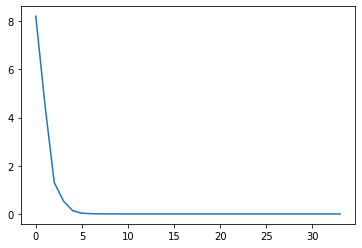

/media/ravi/Projects/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


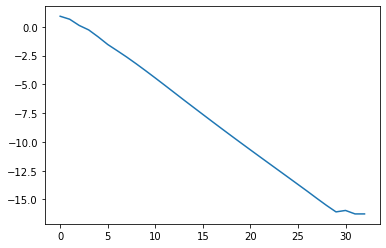

In [10]:
## Plot |J_i+1 - J_i|  vs iterations 
plt.plot (delta_history)
plt.show()

## Ploting the same on exponential scale.
plt.plot (np.log10(delta_history))
plt.show()



We can clearly see that the delta converges to 0 exponentially.

In [11]:
## Initializing policy with all 'up'.
piPI = {}
for i in range(10):
  for j in range(10):
    piPI[(i,j)] = 'up'

## Maintaing pi_i+1 != pi_i history vector
diff_history = []

## Initializing v_PI (J) with all zeros.
v_PI = np.zeros([10, 10])

This cell will implement policy iteration. The policy evaluation is done using an asynchronous value iteration like scheme.

In [12]:
## Policy iteration


# for l in range(4): ### This for loop is there for 2(d)
while(True):
  ## Policy Evaluation
  while (True):
    delta = 0
    #Per state iteration
    for i in range(0, 10):
      for j in range(0, 10):
        prev_v = v_PI[i, j]
        a = piPI [(i, j)]
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v_PI[k, l])
          
        v_PI[i, j] = val
        delta = max(delta, abs(prev_v - val))
    
    #Ending Policy Evaluation Step  once J is found.
    if (delta < 1e-13):
      break


  ## Policy improvement
    
  diff = 0
  for i in range(0, 10):
    for j in range(0, 10):
      prev_action = piPI[(i,j)]
      max_val = -183303 #-infty
      for a in actions:
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v_PI[k, l])
          
        if (val > max_val):
          max_val = val
          piPI[(i, j)] = a
      if (i, j) in random_statesPI.keys():
        random_statesPI[(i, j)].append(max_val)

         
    
      if (piPI[(i, j)] != prev_action):
        diff += 1
  diff_history.append(diff)
  print (diff)
  if (diff == 0):
    piStrPI = piPI
    break    


      
piStrPI = piPI



92
26
10
2
0


 As we can see that both policy iteration and value iteration give similar J* as should be expected. The are exactly the same because in both the cases I am terminating value iteration only when the delta is exactly zero.

In [13]:

print(v_PI - v)

[[-4.44089210e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.22044605e-16 -2.77555756e-16 -3.88578059e-16 -3.33066907e-16
  -3.74700271e-16 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.22044605e-16 -1.66533454e-16 -2.22044605e-16
  -4.44089210e-16 -6.38378239e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.22044605e-16 -3.33066907e-16 -6.10622664e-16
  -9.99200722e-16 -1.55431223e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.22044605e-16 -6.66133815e-16 -1.22124533e-15
  -2.16493490e-15 -3.55271368e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.22044605e-16 -6.66133815e-16 -1.11022302e-15 -2.10942375e-15
  -3.99680289e-15 -7.71605002e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.33066907e-16 -8.88178420e-16 -1.94289029e-15 -3.38618023e-15
  -5.44009282e-15 -2.33146835e-15

In [14]:
print (piPI)

{(0, 0): 'up', (0, 1): 'right', (0, 2): 'right', (0, 3): 'down', (0, 4): 'down', (0, 5): 'down', (0, 6): 'down', (0, 7): 'down', (0, 8): 'down', (0, 9): 'down', (1, 0): 'right', (1, 1): 'right', (1, 2): 'right', (1, 3): 'down', (1, 4): 'down', (1, 5): 'down', (1, 6): 'down', (1, 7): 'down', (1, 8): 'down', (1, 9): 'down', (2, 0): 'right', (2, 1): 'down', (2, 2): 'down', (2, 3): 'down', (2, 4): 'down', (2, 5): 'down', (2, 6): 'down', (2, 7): 'down', (2, 8): 'down', (2, 9): 'down', (3, 0): 'up', (3, 1): 'down', (3, 2): 'down', (3, 3): 'down', (3, 4): 'down', (3, 5): 'down', (3, 6): 'down', (3, 7): 'down', (3, 8): 'down', (3, 9): 'down', (4, 0): 'left', (4, 1): 'down', (4, 2): 'down', (4, 3): 'down', (4, 4): 'down', (4, 5): 'down', (4, 6): 'down', (4, 7): 'down', (4, 8): 'down', (4, 9): 'right', (5, 0): 'left', (5, 1): 'left', (5, 2): 'down', (5, 3): 'down', (5, 4): 'down', (5, 5): 'down', (5, 6): 'down', (5, 7): 'down', (5, 8): 'right', (5, 9): 'right', (6, 0): 'left', (6, 1): 'left', (6

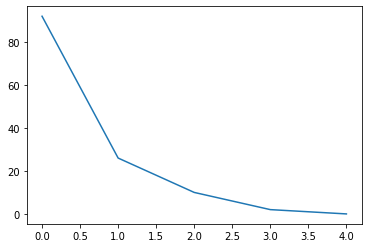

In [15]:
## Policy iteration converges in 6 steps hence we don't have a sufficiently good curve. But we should have expected an exponential curve.
plt.plot(diff_history, label='Policy Iteration')

plt.show()


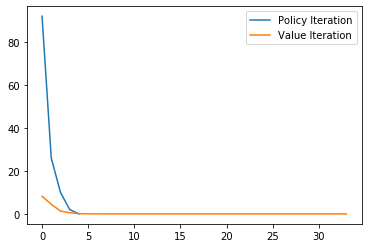

In [16]:
## Simultaneous plots after scaling down to similar scales

plt.plot(diff_history, label='Policy Iteration')
plt.plot(delta_history, label='Value Iteration')
plt.legend()
plt.show()


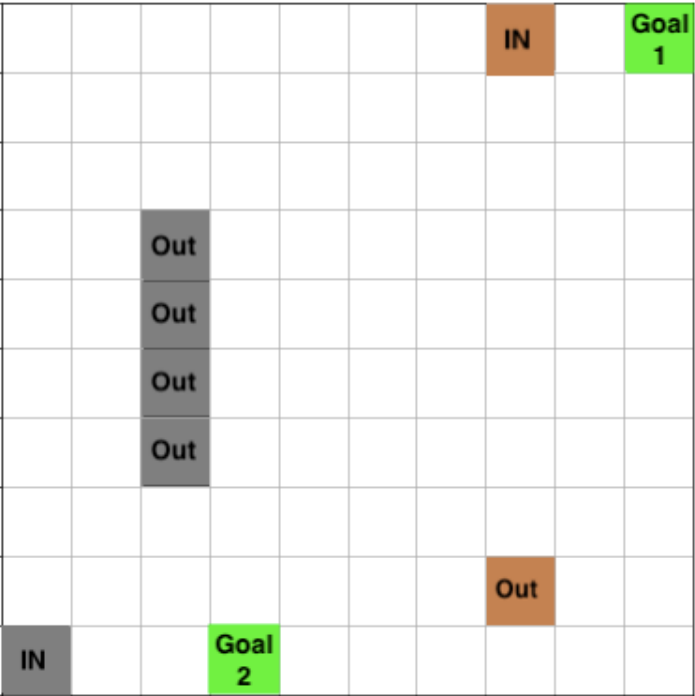

In [17]:
!ls -a
# !conda install -c conda-forge opencv
import cv2
grIm = cv2.imread('grid.png')

 .		      J_PI.png	      q5_goal1.ipynb
 ..		      J_VI.png	      q5_goal2.ipynb
 ans.png	      pi_PI.png      'RL_assignment_q5 - Google Docs.pdf'
 grid.png	      pi_VI.png       submission
 .ipynb_checkpoints   q5_goal1.html   submission.zip


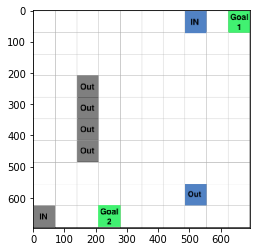

In [18]:
plt.imshow(grIm)
plt.show()

In [19]:
[w, h, channels] = (np.shape(grIm))

In [20]:
def draw_arrow(dirc, im, cellt):
    cell = [cellt[0], 9 - cellt[1]]
    
    if dirc == 'down':
        start_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 7)  
        end_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 53)
    if dirc == 'up':
        start_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 53)  
        end_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 7)
    if dirc == 'right':
        start_point = (cell[0]*w//10 + 7, cell[1]*h//10 + 30)  
        end_point = (cell[0]*w//10 + 53, cell[1]*h//10 + 30)
    if dirc == 'left':
        start_point = (cell[0]*w//10 + 53, cell[1]*h//10 + 30)  
        end_point = (cell[0]*w//10 + 7, cell[1]*h//10 + 30)
    
    
    color = (255, 0, 0)  
  
  
    thickness = 4
    return cv2.arrowedLine(im, start_point, end_point, color, thickness, tipLength = 0.5)  

In [21]:
# ar = draw_arrow('right', grIm, (3, 7))
# plt.imshow(ar, aspect = 1)
# plt.show()

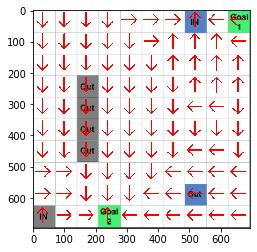

In [22]:
# Policy for value iteration

grIm = cv2.imread('grid.png')
for key, val in piStrVI.items():
    grIm = draw_arrow(val, grIm, key)
plt.imshow(grIm)
cv2.imwrite('pi_VI.png', grIm)

plt.show()

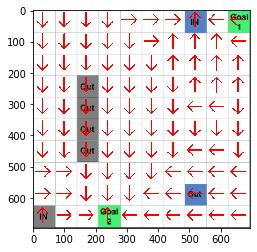

In [23]:
# Policy for policy iteration

grIm = cv2.imread('grid.png')
for key, val in piStrPI.items():
    grIm = draw_arrow(val, grIm, key)
plt.imshow(grIm)
cv2.imwrite('pi_PI.png', grIm)

plt.show()

In [24]:
print (piStrPI == piStrVI)

True


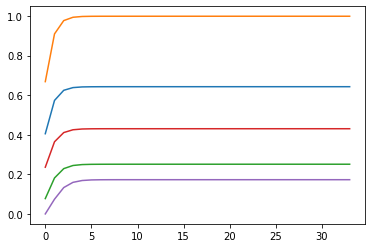

In [25]:
# Value 
for key, value in random_states.items():
    plt.plot(value)
# plt.show()





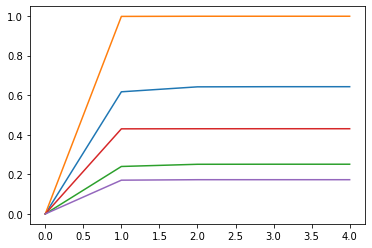

In [26]:
#Policy

for key, value in random_statesPI.items():
    plt.plot(value)
plt.show()

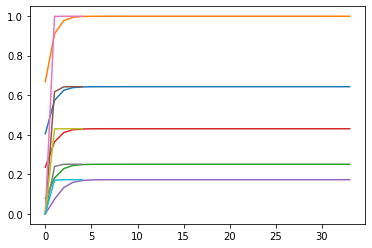

In [27]:
# Both
for key, value in random_states.items():
    plt.plot(value)
# plt.show()



for key, value in random_statesPI.items():
    plt.plot(value)
plt.show()

In [28]:
# Function to inscribe J on the image.
def plot_J(im, J):
    for i in range(10):
        for j in range(10):
            a = i
            b = 9 - j
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(im,str(round(J[i][j], 1)),(a*w//10 + 7 , b*h//10 + 50 ), font, 1,(0,0,255),2,cv2.LINE_AA)

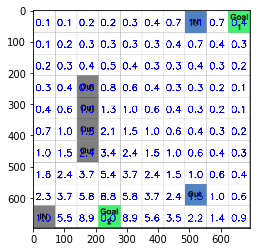

In [29]:
grIm = cv2.imread('grid.png')

plot_J(grIm, v)
cv2.imwrite('J_VI.png', grIm)
plt.imshow(grIm)
plt.show()

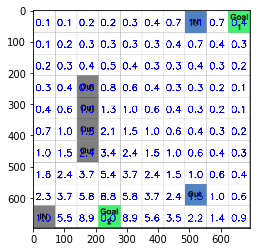

In [30]:
grIm = cv2.imread('grid.png')

plot_J(grIm, v_PI)
cv2.imwrite('J_PI.png', grIm)
plt.imshow(grIm)
plt.show()